**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [4]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Tarefa 1

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [3]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))
    print("Tempos: ", tempos)
    print ("Dados: ", dados)
#No final, decidimos printar os dados e tempos para termos noção dos dados plotados

Espaçamento entre os dados: 0.0320570678937734
Tempos:  [0.0]
Dados:  [1.0]
Tempos:  [0.0, 0.0320570678937734]
Dados:  [1.0, 0.9994862162006879]
Tempos:  [0.0, 0.0320570678937734, 0.0641141357875468]
Dados:  [1.0, 0.9994862162006879, 0.9979453927503363]
Tempos:  [0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019]
Dados:  [1.0, 0.9994862162006879, 0.9979453927503363, 0.9953791129491982]
Tempos:  [0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936]
Dados:  [1.0, 0.9994862162006879, 0.9979453927503363, 0.9953791129491982, 0.9917900138232462]
Tempos:  [0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936, 0.16028533946886697]
Dados:  [1.0, 0.9994862162006879, 0.9979453927503363, 0.9953791129491982, 0.9917900138232462, 0.9871817834144502]
Tempos:  [0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936, 0.16028533946886697, 0.19234240736264038]
Dados:  [1.0, 0.9994862162006879, 0.9

In [4]:
dia = []
type(dia)
print(dia)

[]


In [5]:
help(dia.append)

Help on built-in function append:

append(...) method of builtins.list instance
    L.append(object) -> None -- append object to end



Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

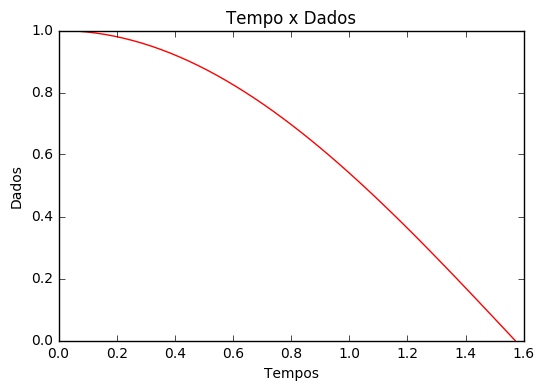

In [6]:
plt.figure()
plt.plot (tempos,dados,'r')
plt.xlabel ('Tempos')
plt.ylabel ('Dados')
plt.title ('Tempo x Dados')

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [7]:
soma = 0 
integral = 0
data_i = dados[0:N-1]
for data_i in dados:
    soma = soma + data_i
    integral = integral + (intervalo*data_i)
print ('O valor da integral será: ', integral)
media = soma / (N-1)
print ('O valo da média das medidas será: ', media)

# Integramos pela regra dos retângulos, onde criamos um contador soma e integral
# e data_i continha os dados nos fornecido
#com o uso de um looping for, para calcular a integral, incrementamos de 0 até o valor final nos dados
#o gráfico gerado nos ajuda a olharmos a integral até onde irão os limites

O valor da integral será:  1.01594289451325
O valo da média das medidas será:  0.6467693342434867


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [8]:
solucao_verdadeira = math.sin(fim) - math.sin(inicio)
print ("A solução analítica verdadeira para a integral é: ", solucao_verdadeira)
# Cálculo para a solução "Real" para a integral com os dados fornecidos
erro_relativo =  integral - solucao_verdadeira
print ("O erro relativo é: ", erro_relativo)
#Usamos o valor calculado anteriormente e a solução verdadeira para acharmos o erro relativo da integral

A solução analítica verdadeira para a integral é:  1.0
O erro relativo é:  0.01594289451325004


### Questão 1
**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

Porque em todas as medições quando se fazem cálculos, temos que levar em consideração os erros das nossas medidas calculadas pelo fato de erro humano, erros relativos as calculadora e dispersões calculadas.

### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

# Tarefa 2

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [9]:
soma_tarefa_2 = 0
for x in range(0, N-1, 1):
    soma_tarefa_2 = soma_tarefa_2 +((dados[x]+dados[x+1])/2)* intervalo
area_dos_trapezios = soma_tarefa_2
print ("A área do Trapézio é igual a ", area_dos_trapezios)
#criando um contador e um looping for para calcular a área pelo trapézio
# em comparação com a regra dos retângulos vemos uma semelhança de valoes, somente com um pequeno erro de incerteza

A área do Trapézio é igual a  0.9999143605663631


Calcule e imprima também a solução analíca e o erro cometido.

In [10]:
x = inicio
y = fim
solucao_analitica = math.sin(y) - math.sin(x)
print('A solução analítica é: ', solucao_analitica)
# para a solução analítica da regra dos trapézios para a integral dada

A solução analítica é:  1.0


In [11]:
erro_cometido = solucao_analitica - area_dos_trapezios
print ('O erro cometido para a regra dos Trapézios é: ', erro_cometido)
# erro calculado para a regra dos trapézios pela integral

O erro cometido para a regra dos Trapézios é:  8.563943363693038e-05


### Questão 2
**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

O erro da regra dos trapézios é menor do que para a regra dos retângulos. Para a regra dso trapézios temos uma aproximação mais próxima do valor que esperamos, que seria exatamente 1.0, logo como já sabemos que a área da integral calculada pela regra dos trapézios teria um erro relativo menor como foi visto pelo cálculo na tarefa 2.

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

# Tarefa 3

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [44]:
fim = math.pi/2
inicio = 0
espaco = []
erro_lista_ret = []
erro_lista_trap = []
#gerar intervalos de espaçamentos entre os dados
for n in range (10,1010,10): 
    intervalo = (fim - inicio)/(n-1)
    espaco.append(n)
    
    dados_4 = []
    tempos_4 = []
    for i in range (n): #vamos gerar os dados
        data = inicio + intervalo * i
        tempos_4.append(data) #dados de tempo
        dados_4.append (math.cos(data)) #dados do cosseno
    
    soma_4 = 0
    for r in range (0,n-1,1): #regra dos retângulos
        soma_4 = soma_4 + intervalo*dados_4[r]
        erro_4 = 1 - soma_4
        absoluto_retangulo = abs(erro_4)
    erro_lista_ret.append(absoluto_retangulo)
    
    soma_5 = 0
    for t in range (0,n-1,1): # regra dos trapézios
        trapezios = intervalo * (dados_4[t]+dados_4[t+1])/2
        soma_5 = soma_5 + trapezios      
        erro_trapezio = 1 - soma_5
        absoluto_trapezio = abs(erro_trapezio)
    erro_lista_trap.append(absoluto_trapezio)
        

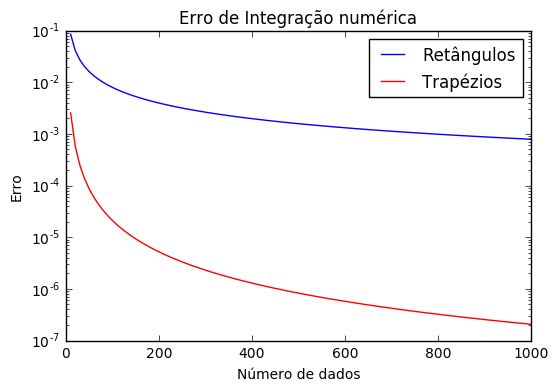

In [54]:
plt.figure()
plt.yscale('log')
plt.xlabel("Número de dados")
plt.ylabel('Erro')
plt.title('Erro de Integração numérica')
plt.plot (espaco, erro_lista_ret,'-b', label = "Retângulos")
plt.plot (espaco, erro_lista_trap, '-r', label = 'Trapézios' )
plt.legend(loc = 'upper right' )

### Questão 3
**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

Quanto mais aumentamos o número de dados, menor ficará o nosso erro. Pelo gráfico por ser as mesmas distâncias, vai ter o mesmo número de dados, então o erro tende a ser o mesmo. Sendo a nossa escala logarítmica, vai chegar uma hora que ela tende a se tornar constante mesmo que aumentando o número de dados tendendo ao infinito.

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

# Tarefa 4
Refazer a **tarefa 3** em forma de script, que deve seguir as mesmas regras de formatação que usamos nos notebooks de Python. O script deve gerar e salvar o gráfico no formato png, além de ter comentários explicando o seu código. O script deve se chamar tarefa4.py

No sublime criamos o arquivo python_4.py com o código gerado na tarefa 3 e, no bash, rodamos o arquivo com o comando python python_4.py e gera-se a imagem desejada e salva em png.

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.

In [7]:
a = -5
b = 5
N = 50
intervalo_bonus = (b - a)/ (N-1)
dado = []
variavel = []
for i in range (N):
    b = a + i * intervalo_bonus
    variavel.append(b)
    dat = (1/(5*(math.pi)**1/2)) * math.exp (-b**2/ (2*5**2))
    dado.append(dat)
    
print ("Dados: ", dado)


Dados:  [0.07722588210404313, 0.08037619108399588, 0.08351576106355206, 0.08663351626583451, 0.0897180690344066, 0.0927577853936016, 0.09574085508377374, 0.09865536551950724, 0.10148937905322108, 0.10423101286713732, 0.10686852076434693, 0.10939037608572831, 0.11178535494466071, 0.11404261894661137, 0.1161517965463973, 0.11810306219270536, 0.11988721241759703, 0.12149573804834336, 0.12292089174995584, 0.12415575014893376, 0.12519426984158044, 0.12603133665310398, 0.12666280758579665, 0.1270855449748919, 0.12729744245810481, 0.12729744245810481, 0.1270855449748919, 0.12666280758579665, 0.12603133665310398, 0.12519426984158044, 0.12415575014893375, 0.12292089174995584, 0.12149573804834336, 0.11988721241759703, 0.11810306219270536, 0.1161517965463973, 0.11404261894661137, 0.11178535494466071, 0.1093903760857283, 0.10686852076434693, 0.10423101286713732, 0.10148937905322108, 0.09865536551950724, 0.09574085508377375, 0.09275778539360159, 0.08971806903440659, 0.0866335162658345, 0.0835157610

In [14]:
soma = 0
i = 0
for z in dado:
    soma = soma + z + dado[i]
    i = i + 1
integral = (soma * intervalo_bonus)/2
print (integral)

1.1050679758480948
